# Weekly data analysis

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
from scipy import stats

In [2]:
# Phase 2: Weekly
sp500_weekly = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1wk")
returns_weekly_df = np.log(sp500_weekly['Close'] / sp500_weekly['Close'].shift(1)).dropna()
returns_weekly = returns_weekly_df.values
dates_weekly = returns_weekly_df.index

print("Weekly Data:")
print(f"Observations: {len(returns_weekly)}")
print(f"Mean return: {returns_weekly.mean():.4f}")
print(f"Std dev: {returns_weekly.std():.4f}")
print("\n")

/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_55178/993158101.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_weekly = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1wk")
[*********************100%***********************]  1 of 1 completed

Weekly Data:
Observations: 573
Mean return: 0.0022
Std dev: 0.0206




## Data exploration

In [3]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

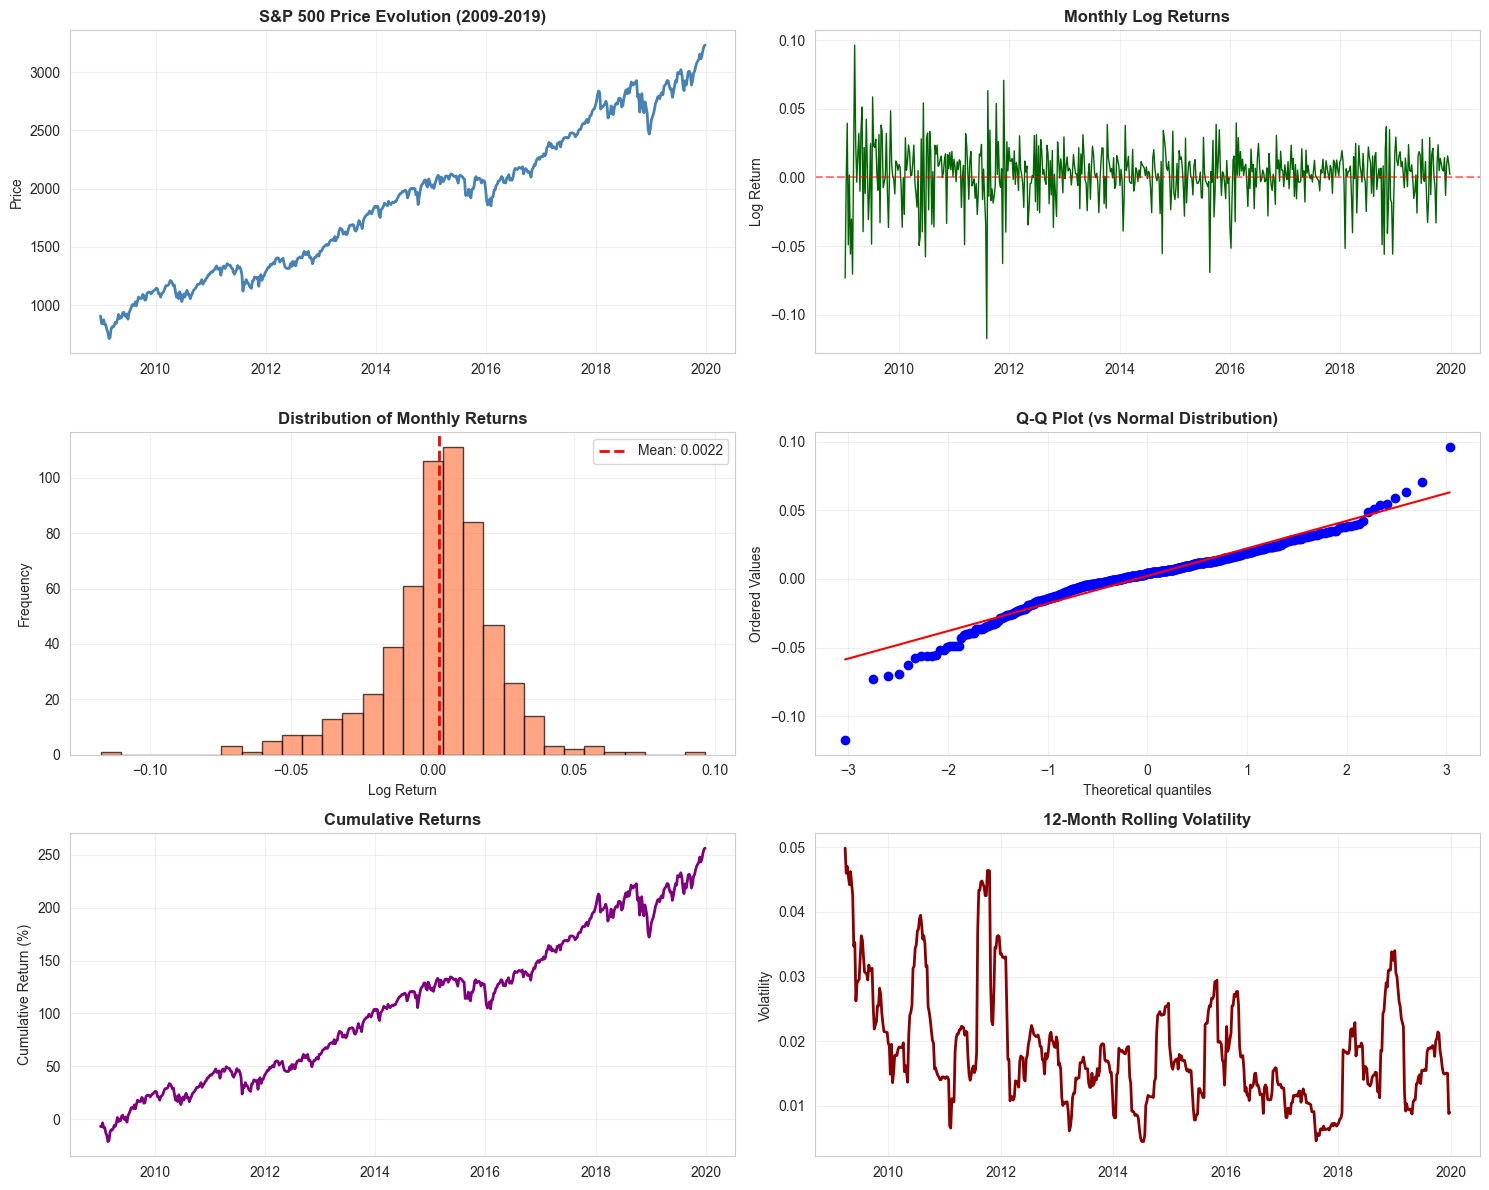


✓ Exploratory plots saved to 'plots/phase2_exploratory.png'


In [5]:
# Create comprehensive exploratory plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Price evolution
axes[0, 0].plot(sp500_weekly.index, sp500_weekly['Close'], color='steelblue', linewidth=2)
axes[0, 0].set_title('S&P 500 Price Evolution (2009-2019)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Price')
axes[0, 0].grid(True, alpha=0.3)

# 2. Log returns over time
axes[0, 1].plot(dates_weekly, returns_weekly, color='darkgreen', linewidth=1)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Monthly Log Returns', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Log Return')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of returns
axes[1, 0].hist(returns_weekly, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(returns_weekly.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_weekly.mean():.4f}')
axes[1, 0].set_title('Distribution of Monthly Returns', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log Return')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot (check for normality)
returns_array = np.array(returns_weekly).flatten()  # Convert to 1D numpy array
stats.probplot(returns_array, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (vs Normal Distribution)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 5. Cumulative returns
cumulative_returns = np.exp(np.cumsum(returns_weekly)) - 1
axes[2, 0].plot(dates_weekly, cumulative_returns * 100, color='purple', linewidth=2)
axes[2, 0].set_title('Cumulative Returns', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Cumulative Return (%)')
axes[2, 0].grid(True, alpha=0.3)

# 6. Rolling volatility (12-month window)
rolling_vol = returns_weekly_df.rolling(window=12).std()
axes[2, 1].plot(rolling_vol.index, rolling_vol.values, color='darkred', linewidth=2)
axes[2, 1].set_title('12-Month Rolling Volatility', fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel('Volatility')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots2/phase2_exploratory.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Exploratory plots saved to 'plots/phase2_exploratory.png'")